In [221]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import os

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from tensorflow.keras import layers, ops
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Reshape, Dense, Dropout, Input, BatchNormalization, LeakyReLU

# import umap.plot

# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
# import nbformat

In [222]:
def get_clf_eval(y_test, pred=None, pred_proba=None, verbose=1):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)   
     
    roc_auc = roc_auc_score(y_test, pred_proba)

    # ROC-AUC print
    if verbose:
        print('confusion matrix')
        print(confusion)
        print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
        F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    return confusion
def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))
  
def visualize_cfm(y, y_pred):
  # Define TP, TN, FP, FN conditions
  TP = (test_labels == 1) & (ae_preds == True)  # Actual normal, predicted normal
  TN = (test_labels == 0) & (ae_preds == False)   # Actual anomalous, predicted anomalous
  FP = (test_labels == 0) & (ae_preds == True)  # Actual anomalous, predicted normal
  FN = (test_labels == 1) & (ae_preds == False)   # Actual normal, predicted anomalous

  # Extract the relevant data arrays
  tp_data = test_data[TP]
  tn_data = test_data[TN]
  fp_data = test_data[FP]
  fn_data = test_data[FN]

  # You can now plot these specific cases using the provided function
  # For example, plotting a single instance of each:
  fig, axes = plt.subplots(2, 2, figsize=(15, 5))

  # TP plot
  axes[0, 0].grid()
  axes[0, 0].plot(np.arange(140), tp_data[0], color='skyblue', label="Anomalous")
  axes[0, 0].plot(np.arange(140), autoencoder.predict(tp_data[0:1])[0], color='sandybrown', label="Reconstruction", linewidth=2.0)
  axes[0, 0].set_title("A TP ECG Reconstruction")

  # FN plot
  axes[0, 1].grid()
  axes[0, 1].plot(np.arange(140), fn_data[0], color='skyblue', label="Anomalous")
  axes[0, 1].plot(np.arange(140), autoencoder.predict(fn_data[0:1])[0], color='sandybrown', label="Reconstruction", linewidth=2.0)
  axes[0, 1].set_title("An FN ECG Reconstruction")

  # FP plot
  axes[1, 0].grid()
  axes[1, 0].plot(np.arange(140), fp_data[0], color='lightcoral', label="Normal")
  axes[1, 0].plot(np.arange(140), autoencoder.predict(fp_data[0:1])[0], color='sandybrown', label="Reconstruction", linewidth=2.0)
  axes[1, 0].set_title("An FP ECG Reconstruction")

  # TN plot
  axes[1, 1].grid()
  axes[1, 1].plot(np.arange(140), tn_data[0], color='lightcoral', label="Normal")
  axes[1, 1].plot(np.arange(140), autoencoder.predict(tn_data[0:1])[0], color='sandybrown', label="Reconstruction", linewidth=2.0)
  axes[1, 1].set_title("A TN ECG Reconstruction")

  plt.title("threshold")
  plt.tight_layout()
  plt.show()

In [223]:
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


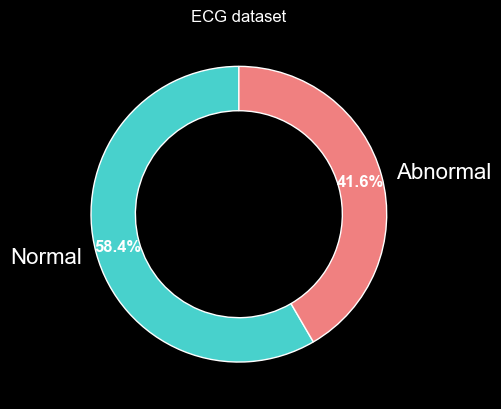

In [224]:
import matplotlib.pyplot as plt

# Define the colors, labels, and values
colors = ['mediumturquoise', 'lightcoral']
labels = ['Normal', 'Abnormal']

value_counts = dataframe[140].value_counts()
values = [value_counts.get(1, 0) / dataframe[140].shape[0],  # Normal (1)
          value_counts.get(0, 0) / dataframe[140].shape[0]]  # Abnormal (0)

# Create a donut chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(values, labels=labels, colors=colors,
                                  autopct='%1.1f%%', startangle=90, pctdistance=0.85,
                                  wedgeprops=dict(width=0.3, edgecolor='white'))

# Customize text and legend colors
for text in texts:
    text.set_color("white")
    text.set_fontsize(16)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(12)

# Title and background color settings
plt.setp(autotexts, weight="bold")
ax.set_title("ECG dataset", color="white")
fig.patch.set_facecolor('black')  # Set the figure's background color
ax.patch.set_facecolor('black')  # Set the Axes' background color

plt.show()

In [225]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

In [226]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [227]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

print("the length of train :",len(train_labels))
print("the length of test :",len(test_labels))

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

the length of train : 3998
the length of test : 1000


In [228]:
normal_test_data[0].shape

TensorShape([140])

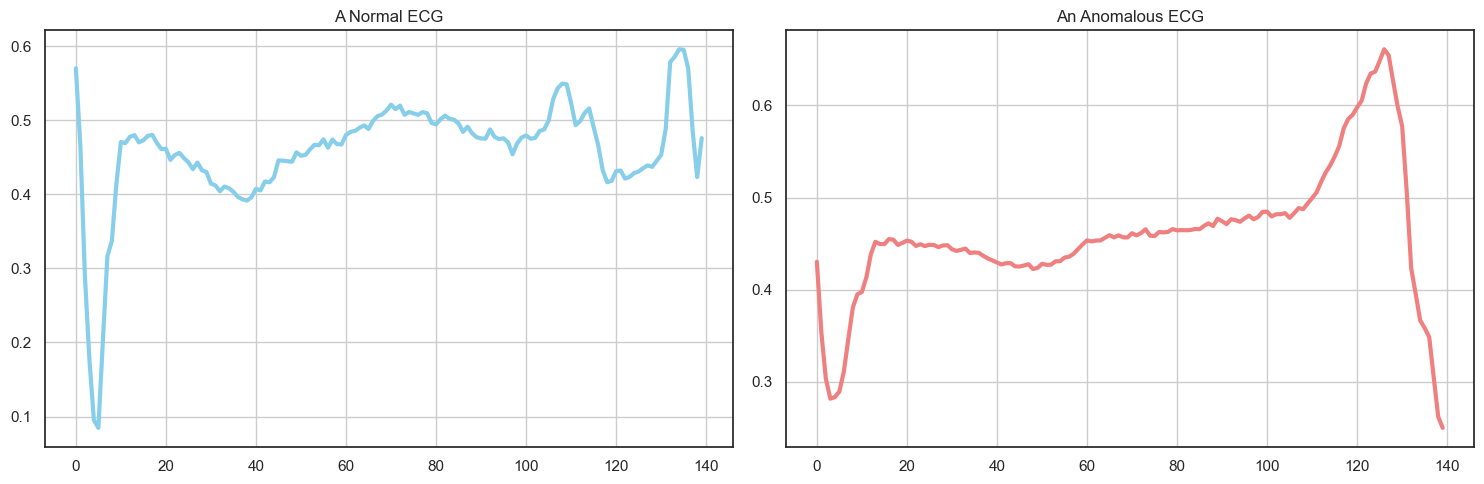

In [229]:
# Set figure size and create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for Normal ECG
axes[0].grid()
axes[0].plot(np.arange(140), normal_train_data[0], color='skyblue', label="Normal", linewidth=3.0)
axes[0].set_title("A Normal ECG")

# Plot for Anomalous ECG
axes[1].grid()
axes[1].plot(np.arange(140), anomalous_train_data[0], color='lightcoral', label="Anomalous", linewidth=3.0)
axes[1].set_title("An Anomalous ECG")
plt.tight_layout()  # Adjust layout for spacing
plt.show()

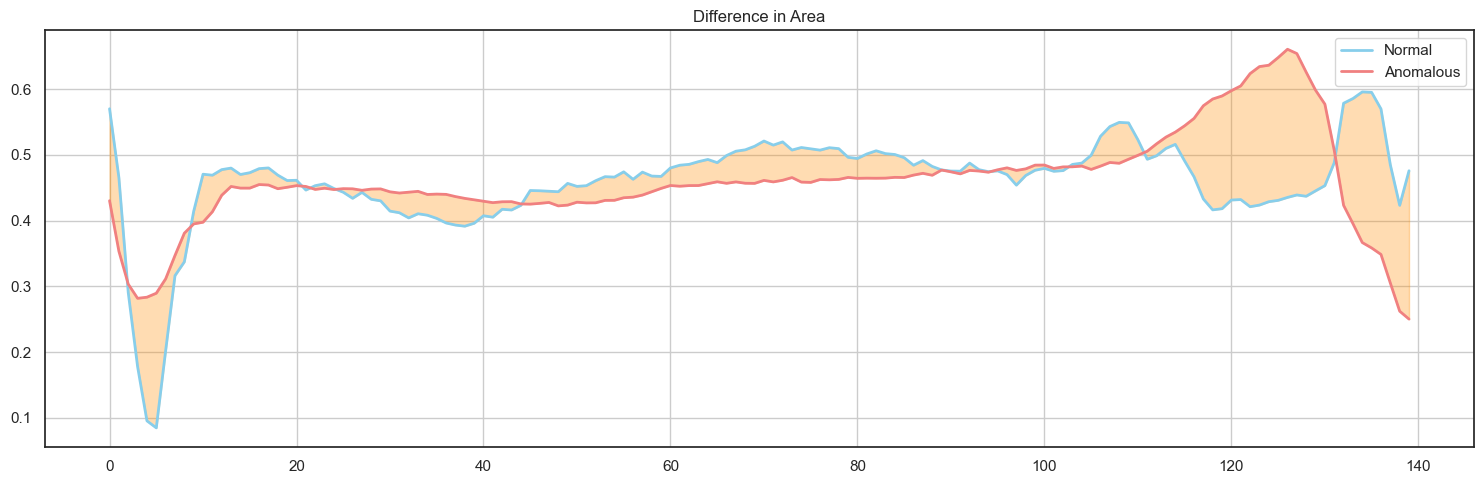

In [230]:
plt.figure(figsize=(15, 5))  # Set the figure size
plt.grid()
plt.plot(np.arange(140), normal_train_data[0], color='skyblue', label="Normal", linewidth=2.0)
plt.plot(np.arange(140), anomalous_train_data[0], color='lightcoral', label="Anomalous", linewidth=2.0)
plt.fill_between(np.arange(140), normal_train_data[0], anomalous_train_data[0], 
                 where=(normal_train_data[0] != anomalous_train_data[0]), color='darkorange', alpha=0.3, interpolate=True)
plt.title("Difference in Area")
plt.legend()

plt.tight_layout()  # Adjust layout for spacing
plt.show()

## Autoencoder

In [231]:
class Autoencoder(Model):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
  def __str__(self):
    return "Autoencoder"

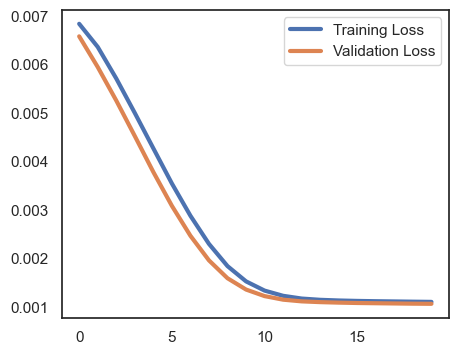

In [232]:
autoencoder = Autoencoder()
opt = Adam(learning_rate=1e-3)
autoencoder.compile(optimizer=opt, loss='mse')
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          verbose=0,
          validation_data=(normal_test_data, normal_test_data),
          shuffle=True)
autoencoder.encoder.save("autoencoder-encoder.keras")
autoencoder.decoder.save("autoencoder-decoder.keras")
plt.figure(figsize=(5,4))
sns.set(font_scale = 1)
sns.set_style("white")
plt.plot(history.history["loss"], label="Training Loss",linewidth=3.0)
plt.plot(history.history["val_loss"], label="Validation Loss",linewidth=3.0)
plt.legend()

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step
Threshold:  0.0023356955


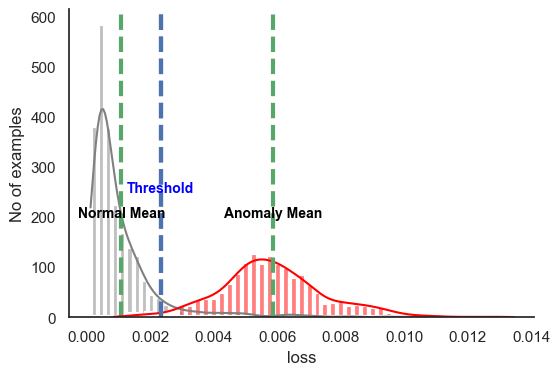

In [233]:
reconstructions = autoencoder.predict(normal_train_data)
normal_train_loss = tf.keras.losses.mse(reconstructions, normal_train_data)

reconstructions = autoencoder.predict(anomalous_train_data)
anomalous_train_loss = tf.keras.losses.mse(reconstructions, anomalous_train_data)

threshold = np.mean(normal_train_loss) + np.std(normal_train_loss)
print("Threshold: ", threshold)
plt.figure(figsize=(6,4))
sns.set(font_scale = 1)
sns.set_style("white")
sns.histplot(normal_train_loss ,bins=50,kde=True,color='grey',linewidth=3)
plt.axvline(x=np.mean(normal_train_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(normal_train_loss), 200, "Normal Mean", horizontalalignment='center', 
         size='small', color='black', weight='semibold')
plt.axvline(x=threshold, color='b', linestyle='--', linewidth=3)
plt.text(threshold, 250, "Threshold", horizontalalignment='center', 
         size='small', color='Blue', weight='semibold')

sns.histplot(anomalous_train_loss ,bins=50,kde=True,color='red',linewidth=3)
plt.axvline(x=np.mean(anomalous_train_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(anomalous_train_loss), 200, "Anomaly Mean", horizontalalignment='center', 
         size='small', color='black', weight='semibold')
plt.axvline(x=threshold, color='b', linestyle='--', linewidth=3)
plt.xlabel("loss")
plt.ylabel("No of examples")
sns.despine()

<class 'tensorflow.python.framework.ops.EagerTensor'>
(1000, 140)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


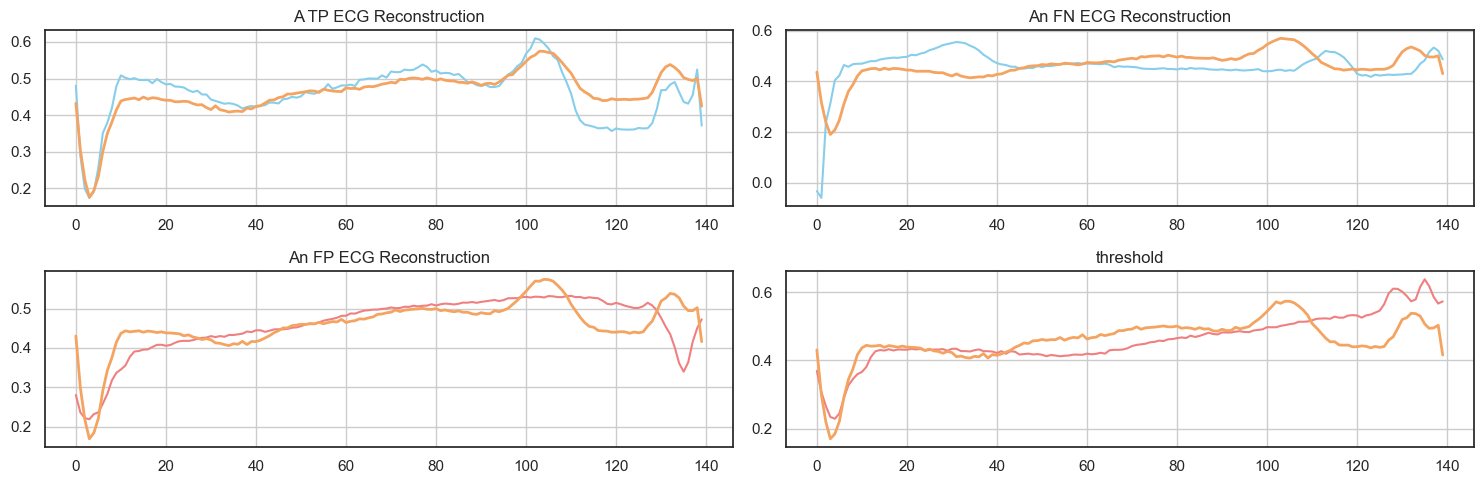

In [234]:
print(type(test_data))
print(test_data.shape)
ae_preds = tf.math.less(tf.keras.losses.mse(autoencoder(test_data), test_data), threshold)
# Define TP, TN, FP, FN conditions
TP = (test_labels == 1) & (ae_preds == True)  # Actual normal, predicted normal
TN = (test_labels == 0) & (ae_preds == False)   # Actual anomalous, predicted anomalous
FP = (test_labels == 0) & (ae_preds == True)  # Actual anomalous, predicted normal
FN = (test_labels == 1) & (ae_preds == False)   # Actual normal, predicted anomalous

# Extract the relevant data arrays
tp_data = test_data[TP]
tn_data = test_data[TN]
fp_data = test_data[FP]
fn_data = test_data[FN]

# You can now plot these specific cases using the provided function
# For example, plotting a single instance of each:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))

# TP plot
axes[0, 0].grid()
axes[0, 0].plot(np.arange(140), tp_data[0], color='skyblue', label="Anomalous")
axes[0, 0].plot(np.arange(140), autoencoder.predict(tp_data[0:1])[0], color='sandybrown', label="Reconstruction", linewidth=2.0)
axes[0, 0].set_title("A TP ECG Reconstruction")

# FN plot
axes[0, 1].grid()
axes[0, 1].plot(np.arange(140), fn_data[0], color='skyblue', label="Anomalous")
axes[0, 1].plot(np.arange(140), autoencoder.predict(fn_data[0:1])[0], color='sandybrown', label="Reconstruction", linewidth=2.0)
axes[0, 1].set_title("An FN ECG Reconstruction")

# FP plot
axes[1, 0].grid()
axes[1, 0].plot(np.arange(140), fp_data[0], color='lightcoral', label="Normal")
axes[1, 0].plot(np.arange(140), autoencoder.predict(fp_data[0:1])[0], color='sandybrown', label="Reconstruction", linewidth=2.0)
axes[1, 0].set_title("An FP ECG Reconstruction")

# TN plot
axes[1, 1].grid()
axes[1, 1].plot(np.arange(140), tn_data[0], color='lightcoral', label="Normal")
axes[1, 1].plot(np.arange(140), autoencoder.predict(tn_data[0:1])[0], color='sandybrown', label="Reconstruction", linewidth=2.0)
axes[1, 1].set_title("A TN ECG Reconstruction")

plt.title("threshold")
plt.tight_layout()
plt.show()

confusion matrix
[[433   7]
 [ 43 517]]
accuracy: 0.9500, precision: 0.9866, recall: 0.9232,        F1: 0.9539, AUC:0.9537


<Axes: >

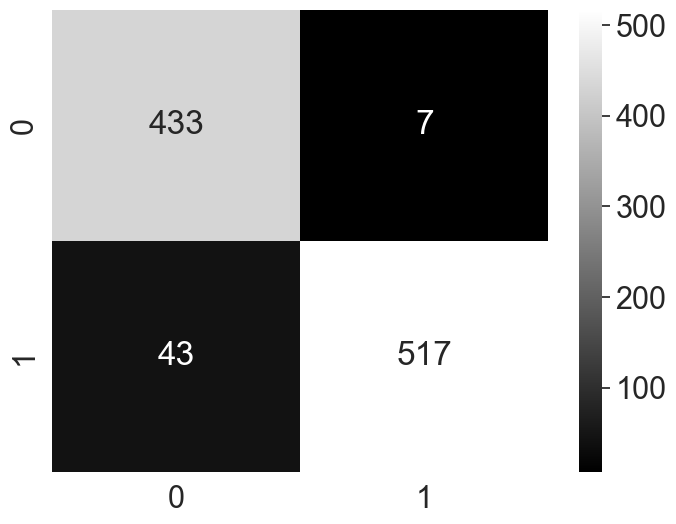

In [235]:
confusion_mat = get_clf_eval(test_labels,ae_preds,ae_preds)
plt.figure(figsize=(8,6))
sns.set(font_scale = 2)
sns.set_style("white")
sns.heatmap(confusion_mat, cmap = 'gist_yarg_r',annot = True, fmt='d')

## VAE With KL and BCE

In [240]:
class VAE(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.encoder, self.decoder = self.build_encoder_decoder()
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            
            # Flatten both target and reconstruction for loss calculation
            data_flat = tf.keras.layers.Flatten()(data)
            reconstruction_flat = tf.keras.layers.Flatten()(reconstruction)
            
            reconstruction_loss = ops.mean(
                tf.keras.losses.binary_crossentropy(data_flat, reconstruction_flat)
            )
            
            kl_loss = -0.5 * (1 + z_log_var - ops.square(z_mean) - ops.exp(z_log_var))
            kl_loss = ops.mean(ops.sum(kl_loss, axis=1))
            total_loss = 0.8*reconstruction_loss + 0.2*kl_loss
            
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def build_encoder_decoder(self):
        class Sampling(layers.Layer):
            """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

            def __init__(self, **kwargs):
                super().__init__(**kwargs)
                self.seed_generator = tf.keras.random.SeedGenerator(1337)

            def call(self, inputs):
                z_mean, z_log_var = inputs
                batch = ops.shape(z_mean)[0]
                dim = ops.shape(z_mean)[1]
                epsilon = tf.keras.random.normal(shape=(batch, dim), seed=self.seed_generator)
                return z_mean + ops.exp(0.5 * z_log_var) * epsilon

        # Define encoder
        latent_dim = 2
        encoder_inputs = tf.keras.Input(shape=(140, 1))
        x = tf.keras.layers.Flatten()(encoder_inputs)
        x = tf.keras.layers.Dense(32, activation="relu")(x)
        x = tf.keras.layers.Dense(16, activation="relu")(x)
        z_mean = layers.Dense(latent_dim, name="z_mean")(x)
        z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
        z = Sampling()([z_mean, z_log_var])
        encoder = tf.keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

        # Define decoder
        latent_inputs = tf.keras.Input(shape=(latent_dim,))
        x = tf.keras.layers.Dense(16, activation="relu")(latent_inputs)
        x = tf.keras.layers.Dense(32, activation="relu")(x)
        decoder_outputs = tf.keras.layers.Dense(140, activation="sigmoid")(x)
        decoder_outputs = tf.keras.layers.Reshape((140, 1))(decoder_outputs)
        decoder = tf.keras.Model(latent_inputs, decoder_outputs, name="decoder")
        return encoder, decoder
        
    def call(self, data):
        z_mean, z_log_var, z = self.encoder(data)
        reconstruction = self.decoder(z)
        return reconstruction
        
    def calculate_loss(self, data):
        z_mean, z_log_var, z = self.encoder(data)
        reconstruction = self.decoder(z)
        
        # Flatten both target and reconstruction for loss calculation
        data_flat = tf.keras.layers.Flatten()(data)
        reconstruction_flat = tf.keras.layers.Flatten()(reconstruction)
        
        # Calculate reconstruction loss for each sample
        reconstruction_loss = tf.keras.losses.binary_crossentropy(
            data_flat, 
            reconstruction_flat,
            from_logits=False
        )  # This returns loss per sample
        
        # Calculate KL loss for each sample without taking the mean
        kl_loss = -0.5 * ops.sum(1 + z_log_var - ops.square(z_mean) - ops.exp(z_log_var), axis=1)
        
        # Calculate total loss for each sample
        individual_losses = reconstruction_loss + kl_loss
        
        return individual_losses

Text(0.5, 1.0, 'Loss')

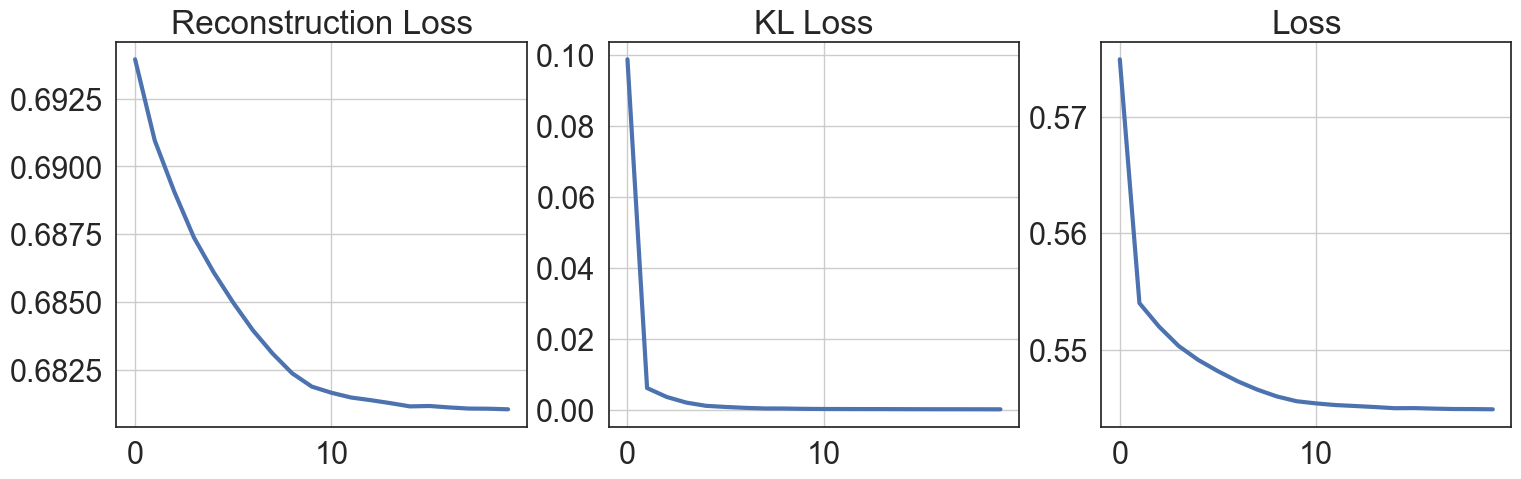

In [241]:
vae = VAE()
opt = Adam(learning_rate=0.003)
vae.compile(optimizer=opt)
history = vae.fit(normal_train_data, 
          epochs=20, 
          batch_size=512,
          verbose=0,
          shuffle=True)

vae.encoder.save("vae-encoder.keras")
vae.decoder.save("vae-decoder.keras")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# TP plot
axes[0].grid()
axes[0].plot(history.history["reconstruction_loss"], label="Training Loss",linewidth=3.0)
axes[0].set_title("Reconstruction Loss")
# TP plot
axes[1].grid()
axes[1].plot(history.history["kl_loss"], label="KL Loss",linewidth=3.0)
axes[1].set_title("KL Loss")
# TP plot
axes[2].grid()
axes[2].plot(history.history["loss"], label="Loss",linewidth=3.0)
axes[2].set_title("Loss")

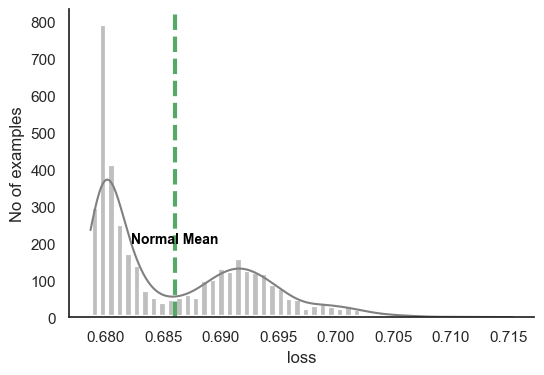

In [242]:
# print(train_data.shape)
# reconstructions = vae_kl.encoder.predict(train_data)
train_loss = vae.calculate_loss(train_data)
plt.figure(figsize=(6,4))
sns.set(font_scale = 1)
sns.set_style("white")

sns.histplot(train_loss ,bins=50,kde=True,color='grey',linewidth=3)
plt.axvline(x=np.mean(train_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(train_loss), 200, "Normal Mean", horizontalalignment='center', 
         size='small', color='black', weight='semibold')

# lower_bound = np.percentile(train_loss, 0.01)
# upper_bound = np.percentile(train_loss, 99.99)
# plt.xlim(lower_bound, upper_bound)

plt.xlabel("loss")
plt.ylabel("No of examples")
sns.despine()

In [243]:
import tensorflow_probability as tfp

best_accuracy = 0
best_lower_bound = 0
best_upper_bound = 100
best_confusion_mat = None

# Calculate the VAE losses
losses = vae.calculate_loss(test_data)

# Loop over possible lower and upper bounds from 0.0 to 100.0 with 0.1 increments
for lower in range(0, 101, 5):  # 0.0 to 100.0
    for upper in range(lower, 101, 5):  # Ensure upper is always >= lower
        # Convert bounds to percentile values
        lower_bound = lower
        upper_bound = upper
        
        # Calculate the percentiles for the current bounds
        percentile_lower = tfp.stats.percentile(losses, lower_bound)
        percentile_upper = tfp.stats.percentile(losses, upper_bound)
        
        # Create a boolean mask for inliers (True) and outliers (False)
        tmp_pred = tf.logical_and(
            tf.greater_equal(losses, percentile_lower),
            tf.less_equal(losses, percentile_upper)
        )

        # Convert boolean mask to integer predictions
        tmp_pred = tf.cast(tmp_pred, dtype=tf.int32)
        # Generate the confusion matrix and evaluate accuracy or another metric
        confusion_mat = get_clf_eval(test_labels, tmp_pred, tmp_pred, 0)
        accuracy = tf.reduce_sum(tf.linalg.diag_part(confusion_mat)) / tf.reduce_sum(confusion_mat)

        # Check if this is the best accuracy so far
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lower_bound = lower_bound
            best_upper_bound = upper_bound
            best_confusion_mat = confusion_mat
            vae_preds = tmp_pred
            

# Display the best bounds and confusion matrix
print(f"Best lower bound: {best_lower_bound}")
print(f"Best upper bound: {best_upper_bound}")
print(f"Best accuracy: {best_accuracy}")

Best lower bound: 0
Best upper bound: 55
Best accuracy: 0.958


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


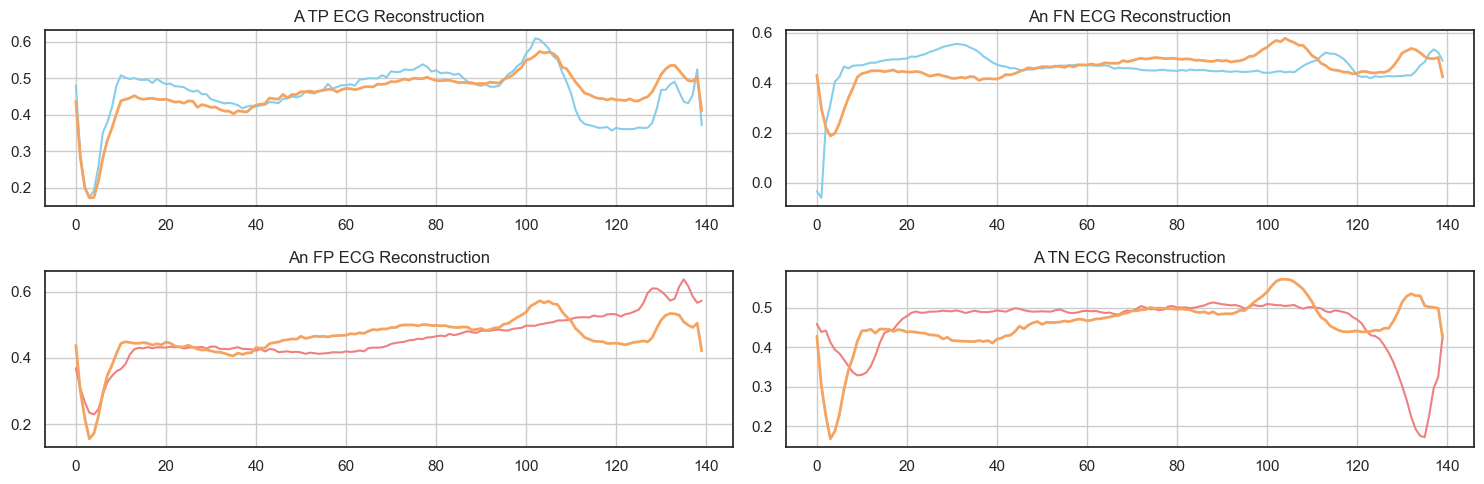

In [244]:
# Define TP, TN, FP, FN conditions
TP = (test_labels == 1) & (vae_preds == True)  # Actual normal, predicted normal
TN = (test_labels == 0) & (vae_preds == False)   # Actual anomalous, predicted anomalous
FP = (test_labels == 0) & (vae_preds == True)  # Actual anomalous, predicted normal
FN = (test_labels == 1) & (vae_preds == False)   # Actual normal, predicted anomalous

# Extract the relevant data arrays
tp_data = test_data[TP]
tn_data = test_data[TN]
fp_data = test_data[FP]
fn_data = test_data[FN]

# You can now plot these specific cases using the provided function
# For example, plotting a single instance of each:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
# TP plot
axes[0, 0].grid()
axes[0, 0].plot(np.arange(140), tp_data[0], color='skyblue', label="Anomalous")
axes[0, 0].plot(np.arange(140), vae.predict(tp_data[0:1])[0].squeeze(), color='sandybrown', label="Reconstruction", linewidth=2.0)
axes[0, 0].set_title("A TP ECG Reconstruction")

# FN plot
axes[0, 1].grid()
axes[0, 1].plot(np.arange(140), fn_data[0], color='skyblue', label="Anomalous")
axes[0, 1].plot(np.arange(140), vae.predict(fn_data[0:1])[0].squeeze(), color='sandybrown', label="Reconstruction", linewidth=2.0)
axes[0, 1].set_title("An FN ECG Reconstruction")

# FP plot
axes[1, 0].grid()
axes[1, 0].plot(np.arange(140), fp_data[0], color='lightcoral', label="Normal")
axes[1, 0].plot(np.arange(140), vae.predict(fp_data[0:1])[0].squeeze(), color='sandybrown', label="Reconstruction", linewidth=2.0)
axes[1, 0].set_title("An FP ECG Reconstruction")

# TN plot
axes[1, 1].grid()
axes[1, 1].plot(np.arange(140), tn_data[0], color='lightcoral', label="Normal")
axes[1, 1].plot(np.arange(140), vae.predict(tn_data[0:1])[0].squeeze(), color='sandybrown', label="Reconstruction", linewidth=2.0)
axes[1, 1].set_title("A TN ECG Reconstruction")

plt.tight_layout()
plt.show()

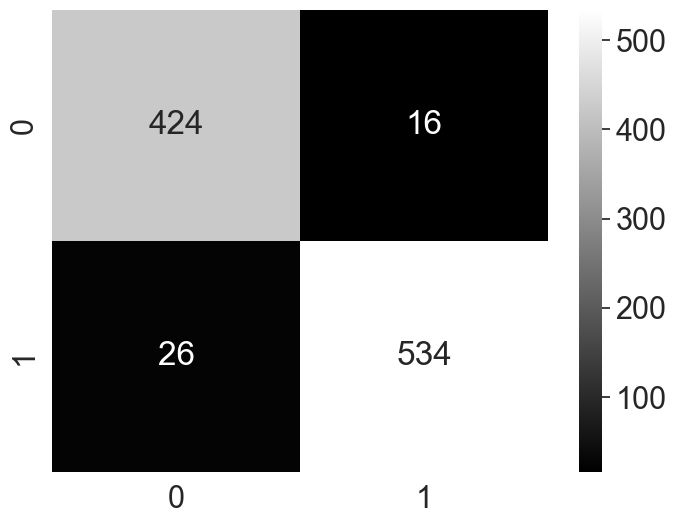

In [245]:
# Plot the best confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=2)
sns.set_style("white")
sns.heatmap(best_confusion_mat, cmap='gist_yarg_r', annot=True, fmt='d')
plt.show()

## Bigan

In [246]:
class BIGAN(Model):
    def __init__(self):
        super(BIGAN, self).__init__()
        
        self.latent_dim = 32
        self.img_shape = (140, 1)
        
        # Create separate optimizers for each component
        self.encoder_optimizer = Adam(1e-3, 0.5)
        self.generator_optimizer = Adam(1e-3, 0.5)
        self.discriminator_optimizer = Adam(3e-5, 0.5)
        # d_optimizer = Adam(0.0002, 0.5)
        
        # Build all components
        self.encoder = self.build_encoder()
        self.generator = self.build_generator()
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss=['binary_crossentropy'],
            optimizer=self.discriminator_optimizer,
            metrics=['accuracy'])
        self.encoder.compile(loss=['binary_crossentropy'],
            optimizer=self.encoder_optimizer)
        self.generator.compile(loss=['binary_crossentropy'],
            optimizer=self.generator_optimizer)
        
        # Generate image from sampled noise
        z = Input(shape=(self.latent_dim, ))
        img_ = self.generator(z)

        # Encode image
        img = Input(shape=self.img_shape)
        z_ = self.encoder(img)

        # Latent -> img is fake, and img -> latent is valid
        fake = self.discriminator([z, img_])
        valid = self.discriminator([z_, img])


        # self.bigan_generator = Model([z, img], [fake, valid])
        # self.bigan_generator.compile(loss=['binary_crossentropy', 'binary_crossentropy'],
        #     optimizer=ge_optimizer)
        # Metrics
        self.d_loss_metric = tf.keras.metrics.Mean(name="d_loss")
        self.ge_loss_metric = tf.keras.metrics.Mean(name="ge_loss")
        self.d_accuracy_metric = tf.keras.metrics.BinaryAccuracy(name="d_accuracy")
        self.g_loss_metric = tf.keras.metrics.Mean(name="g_loss")
        self.e_loss_metric = tf.keras.metrics.Mean(name="e_loss")

    def build_encoder(self):    
        model = Sequential()  
        model.add(Flatten(input_shape=(140, )))
        model.add(Dense(32))
        model.add(LeakyReLU(alpha=0.1))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(16))
        model.add(LeakyReLU(alpha=0.1))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(self.latent_dim))
        img = Input(shape=(140, ))
        z = model(img)
        return Model(img, z)
    
    def build_generator(self):
        model = Sequential()

        model.add(Dense(16, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.1))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(32))
        model.add(LeakyReLU(alpha=0.1))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod((140, )), activation='tanh'))
        model.add(Reshape((140, )))

        z = Input(shape=(self.latent_dim,))
        gen_img = model(z)

        return Model(z, gen_img)
    
    def build_discriminator(self):
        z = Input(shape=(self.latent_dim,))
        img = Input(shape=(140,))
        d_in = tf.keras.layers.Concatenate()([z, img])

        model = Dense(64)(d_in)
        model = LeakyReLU(alpha=0.1)(model)
        model = Dropout(0.5)(model)
        model = Dense(32)(model)
        model = LeakyReLU(alpha=0.1)(model)
        model = Dropout(0.5)(model)
        model = Dense(16)(model)
        model = LeakyReLU(alpha=0.1)(model)
        model = Dropout(0.5)(model)
        validity = Dense(1, activation="sigmoid")(model)

        return Model([z, img], validity)

    @property
    def metrics(self):
        return [self.d_loss_metric, self.ge_loss_metric, self.d_accuracy_metric, self.g_loss_metric, self.e_loss_metric]

    def train_step(self, data):
        img = data
        batch_size = tf.shape(img)[0]

        # Sample noise
        z = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Train Discriminator
        with tf.GradientTape() as tape:
            # Generate fake images and encode real images
            img_ = self.generator(z, training=True)  # G(z)
            z_ = self.encoder(img, training=True)    # E(x)
            
            # Real pairs [E(x), x] should be classified as valid
            d_real = self.discriminator([z_, img], training=True)
            # Fake pairs [z, G(z)] should be classified as fake
            d_fake = self.discriminator([z, img_], training=True)
            
            # Discriminator loss
            valid = tf.ones((batch_size, 1))
            fake = tf.zeros((batch_size, 1))
            d_loss_real = tf.keras.losses.binary_crossentropy(valid, d_real)
            d_loss_fake = tf.keras.losses.binary_crossentropy(fake, d_fake)
            d_loss = 0.5 * tf.reduce_mean(d_loss_real + d_loss_fake)

        # Apply discriminator gradients
        d_gradients = tape.gradient(d_loss, self.discriminator.trainable_variables)
        self.discriminator_optimizer.apply_gradients(
            zip(d_gradients, self.discriminator.trainable_variables)
        )

        # Train Generator and Encoder together
        with tf.GradientTape() as tape:
            # Generate fake images and encode real images
            img_ = self.generator(z, training=True)  # G(z)
            z_ = self.encoder(img, training=True)    # E(x)
            
            # Get discriminator predictions
            fake_pairs = self.discriminator([z, img_], training=True)   # D(z, G(z))
            real_pairs = self.discriminator([z_, img], training=True)   # D(E(x), x)
            
            # Generator and Encoder try to make the discriminator predict opposite labels
            # They want fake pairs to be classified as real and real pairs to be classified as real
            ge_loss = 0.5 * tf.reduce_mean(
                tf.keras.losses.binary_crossentropy(valid, fake_pairs) +
                tf.keras.losses.binary_crossentropy(valid, real_pairs)
            )
        
        # Get gradients for both generator and encoder
        ge_variables = self.generator.trainable_variables + self.encoder.trainable_variables
        ge_gradients = tape.gradient(ge_loss, ge_variables)
        
        # Split gradients between generator and encoder
        g_gradients = ge_gradients[:len(self.generator.trainable_variables)]
        e_gradients = ge_gradients[len(self.generator.trainable_variables):]
        
        # Apply gradients
        self.generator_optimizer.apply_gradients(
            zip(g_gradients, self.generator.trainable_variables)
        )
        self.encoder_optimizer.apply_gradients(
            zip(e_gradients, self.encoder.trainable_variables)
        )

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(ge_loss)
        self.e_loss_metric.update_state(ge_loss)
        self.d_accuracy_metric.update_state(valid, d_real)
        self.d_accuracy_metric.update_state(fake, d_fake)

        return {m.name: m.result() for m in self.metrics}
    
    def calculate_loss(self, data):
        # Encode data and reconstruct
        z_encoded = self.encoder(data)
        reconstruction = self.generator(z_encoded)
        
        # Flatten data and reconstruction
        data_flat = tf.keras.layers.Flatten()(data)
        reconstruction_flat = tf.keras.layers.Flatten()(reconstruction)

        # Reconstruction loss per item
        reconstruction_loss = tf.keras.losses.binary_crossentropy(
            data_flat,
            reconstruction_flat
        )

        # Adversarial loss per item
        real_labels = tf.ones((tf.shape(data)[0], 1))
        fake_labels = tf.zeros((tf.shape(data)[0], 1))

        real_predictions = self.discriminator([data_flat, z_encoded])
        fake_predictions = self.discriminator([reconstruction_flat, z_encoded])

        d_loss_real = tf.keras.losses.binary_crossentropy(
            real_labels, real_predictions
        )
        d_loss_fake = tf.keras.losses.binary_crossentropy(
            fake_labels, fake_predictions
        )

        # Combine losses without reduction (per item)
        total_loss = reconstruction_loss + 0.5 * (d_loss_real + d_loss_fake)

        return total_loss


    def call(self, data):
        encoded = self.encoder(data)
        
        # Decode the latent representation back to original space
        reconstructed = self.generator(encoded)
        
        return reconstructed

c:\Users\trucp\miniconda3\envs\cs313\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\trucp\miniconda3\envs\cs313\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\trucp\miniconda3\envs\cs313\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Text(0.5, 1.0, 'Encoder Loss')

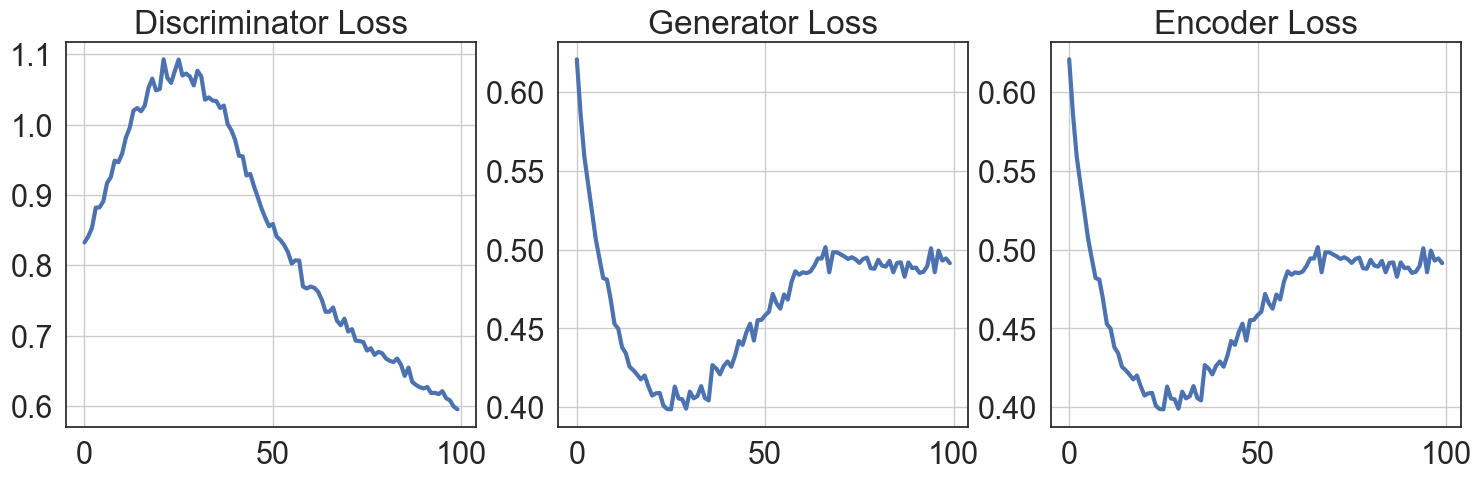

In [247]:
bigan = BIGAN()
bigan.compile()
history = bigan.fit(train_data, 
          epochs=100, 
          batch_size=512,
          verbose=0,
          shuffle=True)

bigan.generator.save("bigan-generator.keras")
bigan.encoder.save("bigan-encoder.keras")
bigan.discriminator.save("bigan-discriminator.keras")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# TP plot
axes[0].grid()
axes[0].plot(history.history["d_loss"], label="Discriminator Loss",linewidth=3.0)
axes[0].set_title("Discriminator Loss")
# TP plot
axes[1].grid()
axes[1].plot(history.history["g_loss"], label="Generator Loss",linewidth=3.0)
axes[1].set_title("Generator Loss")

axes[2].grid()
axes[2].plot(history.history["e_loss"], label="Encoder Loss",linewidth=3.0)
axes[2].set_title("Encoder Loss")

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step
Threshold:  0.6146542


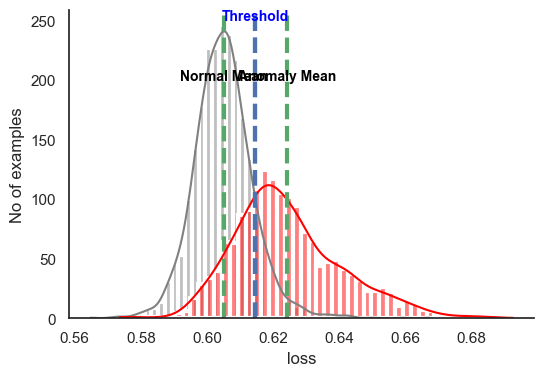

In [248]:
reconstructions = bigan.predict(normal_train_data)
normal_train_loss = tf.keras.losses.binary_crossentropy(reconstructions, normal_train_data)

reconstructions = bigan.predict(anomalous_train_data)
anomalous_train_loss = tf.keras.losses.binary_crossentropy(reconstructions, anomalous_train_data)

threshold = (np.mean(normal_train_loss) + np.mean(anomalous_train_loss))/2
print("Threshold: ", threshold)
plt.figure(figsize=(6,4))
sns.set(font_scale = 1)
sns.set_style("white")
sns.histplot(normal_train_loss ,bins=50,kde=True,color='grey',linewidth=3)
plt.axvline(x=np.mean(normal_train_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(normal_train_loss), 200, "Normal Mean", horizontalalignment='center', 
         size='small', color='black', weight='semibold')
plt.axvline(x=threshold, color='b', linestyle='--', linewidth=3)
plt.text(threshold, 250, "Threshold", horizontalalignment='center', 
         size='small', color='Blue', weight='semibold')

sns.histplot(anomalous_train_loss ,bins=50,kde=True,color='red',linewidth=3)
plt.axvline(x=np.mean(anomalous_train_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(anomalous_train_loss), 200, "Anomaly Mean", horizontalalignment='center', 
         size='small', color='black', weight='semibold')
plt.axvline(x=threshold, color='b', linestyle='--', linewidth=3)
plt.xlabel("loss")
plt.ylabel("No of examples")
sns.despine()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


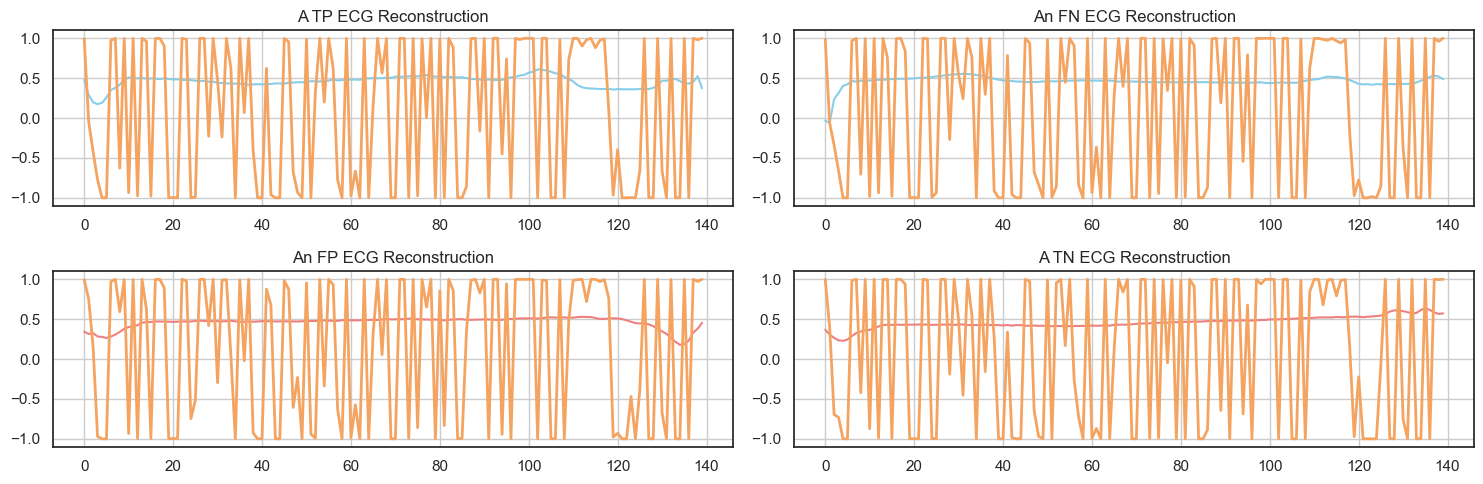

In [249]:
bigan_preds = tf.math.less(tf.keras.losses.binary_crossentropy(bigan.predict(test_data), test_data), threshold) if threshold > np.mean(normal_train_loss) else \
  tf.math.greater(tf.keras.losses.binary_crossentropy(bigan.predict(test_data), test_data), threshold)

# Define TP, TN, FP, FN conditions
TP = (test_labels == 1) & (bigan_preds == True)  # Actual normal, predicted normal
TN = (test_labels == 0) & (bigan_preds == False)   # Actual anomalous, predicted anomalous
FP = (test_labels == 0) & (bigan_preds == True)  # Actual anomalous, predicted normal
FN = (test_labels == 1) & (bigan_preds == False)   # Actual normal, predicted anomalous

# Extract the relevant data arrays
tp_data = test_data[TP]
tn_data = test_data[TN]
fp_data = test_data[FP]
fn_data = test_data[FN]

# You can now plot these specific cases using the provided function
# For example, plotting a single instance of each:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
# TP plot
axes[0, 0].grid()
axes[0, 0].plot(np.arange(140), tp_data[0], color='skyblue', label="Anomalous")
axes[0, 0].plot(np.arange(140), bigan.predict(tp_data[0:1])[0], color='sandybrown', label="Reconstruction", linewidth=2.0)
axes[0, 0].set_title("A TP ECG Reconstruction")

# FN plot
axes[0, 1].grid()
axes[0, 1].plot(np.arange(140), fn_data[0], color='skyblue', label="Anomalous")
axes[0, 1].plot(np.arange(140), bigan.predict(fn_data[0:1])[0], color='sandybrown', label="Reconstruction", linewidth=2.0)
axes[0, 1].set_title("An FN ECG Reconstruction")

# FP plot
axes[1, 0].grid()
axes[1, 0].plot(np.arange(140), fp_data[0], color='lightcoral', label="Normal")
axes[1, 0].plot(np.arange(140), bigan.predict(fp_data[0:1])[0], color='sandybrown', label="Reconstruction", linewidth=2.0)
axes[1, 0].set_title("An FP ECG Reconstruction")

# TN plot
axes[1, 1].grid()
axes[1, 1].plot(np.arange(140), tn_data[0], color='lightcoral', label="Normal")
axes[1, 1].plot(np.arange(140), bigan.predict(tn_data[0:1])[0], color='sandybrown', label="Reconstruction", linewidth=2.0)
axes[1, 1].set_title("A TN ECG Reconstruction")

plt.tight_layout()
plt.show()

confusion matrix
[[315 125]
 [ 55 505]]
accuracy: 0.8200, precision: 0.8016, recall: 0.9018,        F1: 0.8487, AUC:0.8088


<Axes: >

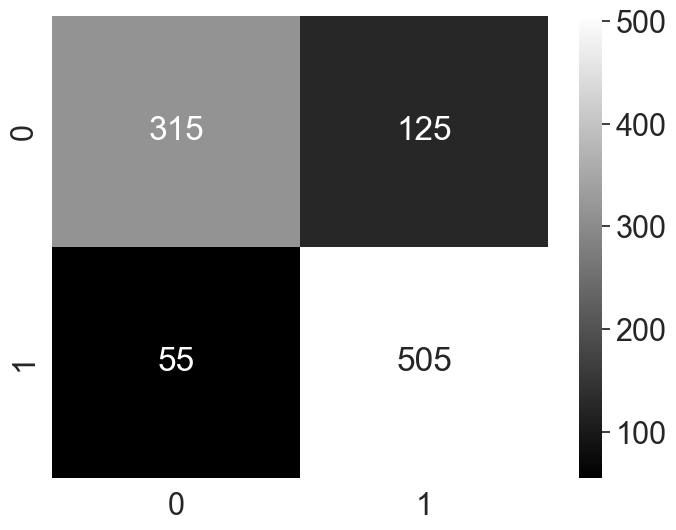

In [250]:
confusion_mat = get_clf_eval(test_labels,bigan_preds,bigan_preds)
plt.figure(figsize=(8,6))
sns.set(font_scale = 2)
sns.set_style("white")
sns.heatmap(confusion_mat, cmap = 'gist_yarg_r',annot = True, fmt='d')

## Group Eval

In [251]:
def get_group_eval(y_test, preds=None, pred_proba=None):
    results = []
    for name, pred in preds:
        confusion = confusion_matrix(y_test, pred)
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred)
        recall = recall_score(y_test, pred)
        f1 = f1_score(y_test, pred)
        results.append({
            'Name': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
        })
    results_df = pd.DataFrame(results)
    # Sort by 'Accuracy' in descending order
    results_df = results_df.sort_values(by='Accuracy', ascending=False)
    return results_df

# Example call
get_group_eval(test_labels, [("Autoencoder", ae_preds), ("VAE", vae_preds), ("BiGAN", bigan_preds)])

,Name,Accuracy,Precision,Recall,F1 Score
1,VAE,0.958,0.970909,0.953571,0.962162
0,Autoencoder,0.950,0.986641,0.923214,0.953875
2,BiGAN,0.820,0.801587,0.901786,0.848739
